In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def process(alpha,T,q,r):
    t=np.linspace(0,T,T+1)
    x=np.zeros(len(t))
    x[0]=np.random.normal(0.1,0.01)
    error=np.random.normal(0,q,len(t))
    error1=np.random.normal(0,r,len(t)-1)
    for i in range(1,len(t)):
        x[i]=alpha*x[i-1]*(1-x[i-1])+error[i]
    y=x[1:]+error1
    return t,x,y

In [27]:
alpha=0.7
q=0.001
r=0.005
T=30
t,x,y=process(alpha,T,q,r)

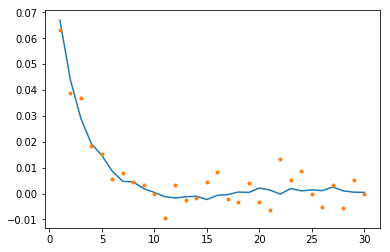

In [28]:
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y,".")


# KALMAN FILTER

In [29]:
def m(x,alpha):
    return alpha*x*(1-x)
def M(x,alpha):
    return alpha*(1-2*x)
def h(x):
    return x
def H(x):
    return 1

In [36]:
def Extended_Kalman(alpha,mean,sigma,q,r):
    n=len(t)-1
    forcast=np.zeros(n)
    forcast_u=np.zeros(n)
    mean_new=np.zeros(n)
    gain=np.zeros(n)
    sigma_new=np.zeros(n)
    mean_old=m(mean,alpha)
    sigma_old=q**2+M(mean,alpha)*sigma*M(mean,alpha)
    for i in range(0,n):
        forcast[i]=mean_old
        forcast_u[i]=sigma_old
        gain[i]=sigma_old*H(mean_old)*(H(mean_old)*sigma_old*H(mean_old)+r**2)**(-1)
        mean_new[i]=mean_old+gain[i]*(y[i]-h(mean_old))
        sigma_new[i]=(1-gain[i]*H(mean_old))*sigma_old
        
        mean_old=m(mean_new[i],alpha)
        sigma_old=q**2+ M(mean_new[i],alpha)*sigma_new[i]*M(mean_new[i],alpha)
    return mean_new,sigma_new, gain,forcast

In [37]:
alpha=0.9
mean=0.1
sigma=0.01
#q=0.001
r=0.5
mean_new,sigma_new, gain, forcast=Extended_Kalman(alpha,mean,sigma,q,r)

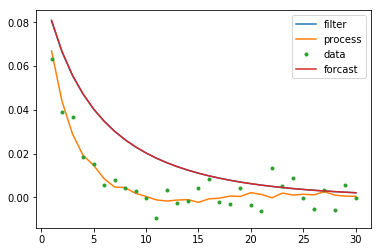

In [38]:
plt.plot(t[1:],mean_new)
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y,".")
plt.plot(t[1:],forcast)
plt.legend(["filter","process","data","forcast"])